In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/heart_2020_cleaned.csv')
df.shape

(319795, 18)

(array([1.72840e+04, 1.72106e+05, 1.00863e+05, 2.33270e+04, 4.88800e+03,
        9.37000e+02, 2.61000e+02, 8.70000e+01, 2.90000e+01, 1.30000e+01]),
 array([12.02 , 20.303, 28.586, 36.869, 45.152, 53.435, 61.718, 70.001,
        78.284, 86.567, 94.85 ]),
 <a list of 10 Patch objects>)

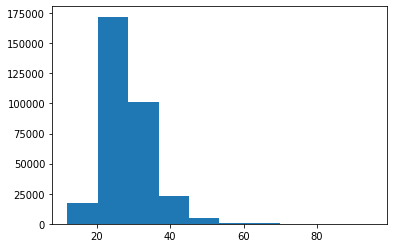

In [4]:
plt.hist(x = df['BMI'], bins = 10)

In [19]:
len(df[df['BMI'] >= 50]), len(df[df['BMI'] >= 60]), len(df[df['BMI'] >= 70]), len(df[df['BMI'] >= 80])

(2517, 492, 129, 34)

(array([60.,  0., 32.,  0., 16.,  0.,  2.,  0., 14.,  5.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

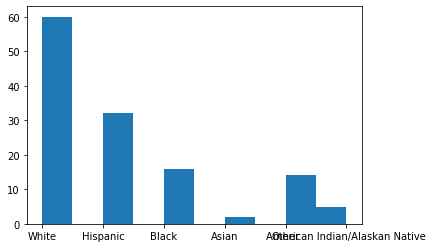

In [22]:
plt.hist(x = df[df['BMI'] >= 70]['Race'])

In [25]:
len(df[df['SleepTime'] == 24])

30

In [ ]:
df = df.drop_duplicates().reset_index()
df

,index,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301712,319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
301713,319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
301714,319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
301715,319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [ ]:
df.describe()

,index,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000
mean,157330.290640,28.441970,3.572298,4.121475,7.084559
std,92603.871127,6.468134,8.140656,8.128288,1.467122
min,0.000000,12.020000,0.000000,0.000000,1.000000
25%,76538.000000,24.030000,0.000000,0.000000,6.000000
50%,155954.000000,27.410000,0.000000,0.000000,7.000000
75%,237304.000000,31.650000,2.000000,4.000000,8.000000
max,319794.000000,94.850000,30.000000,30.000000,24.000000


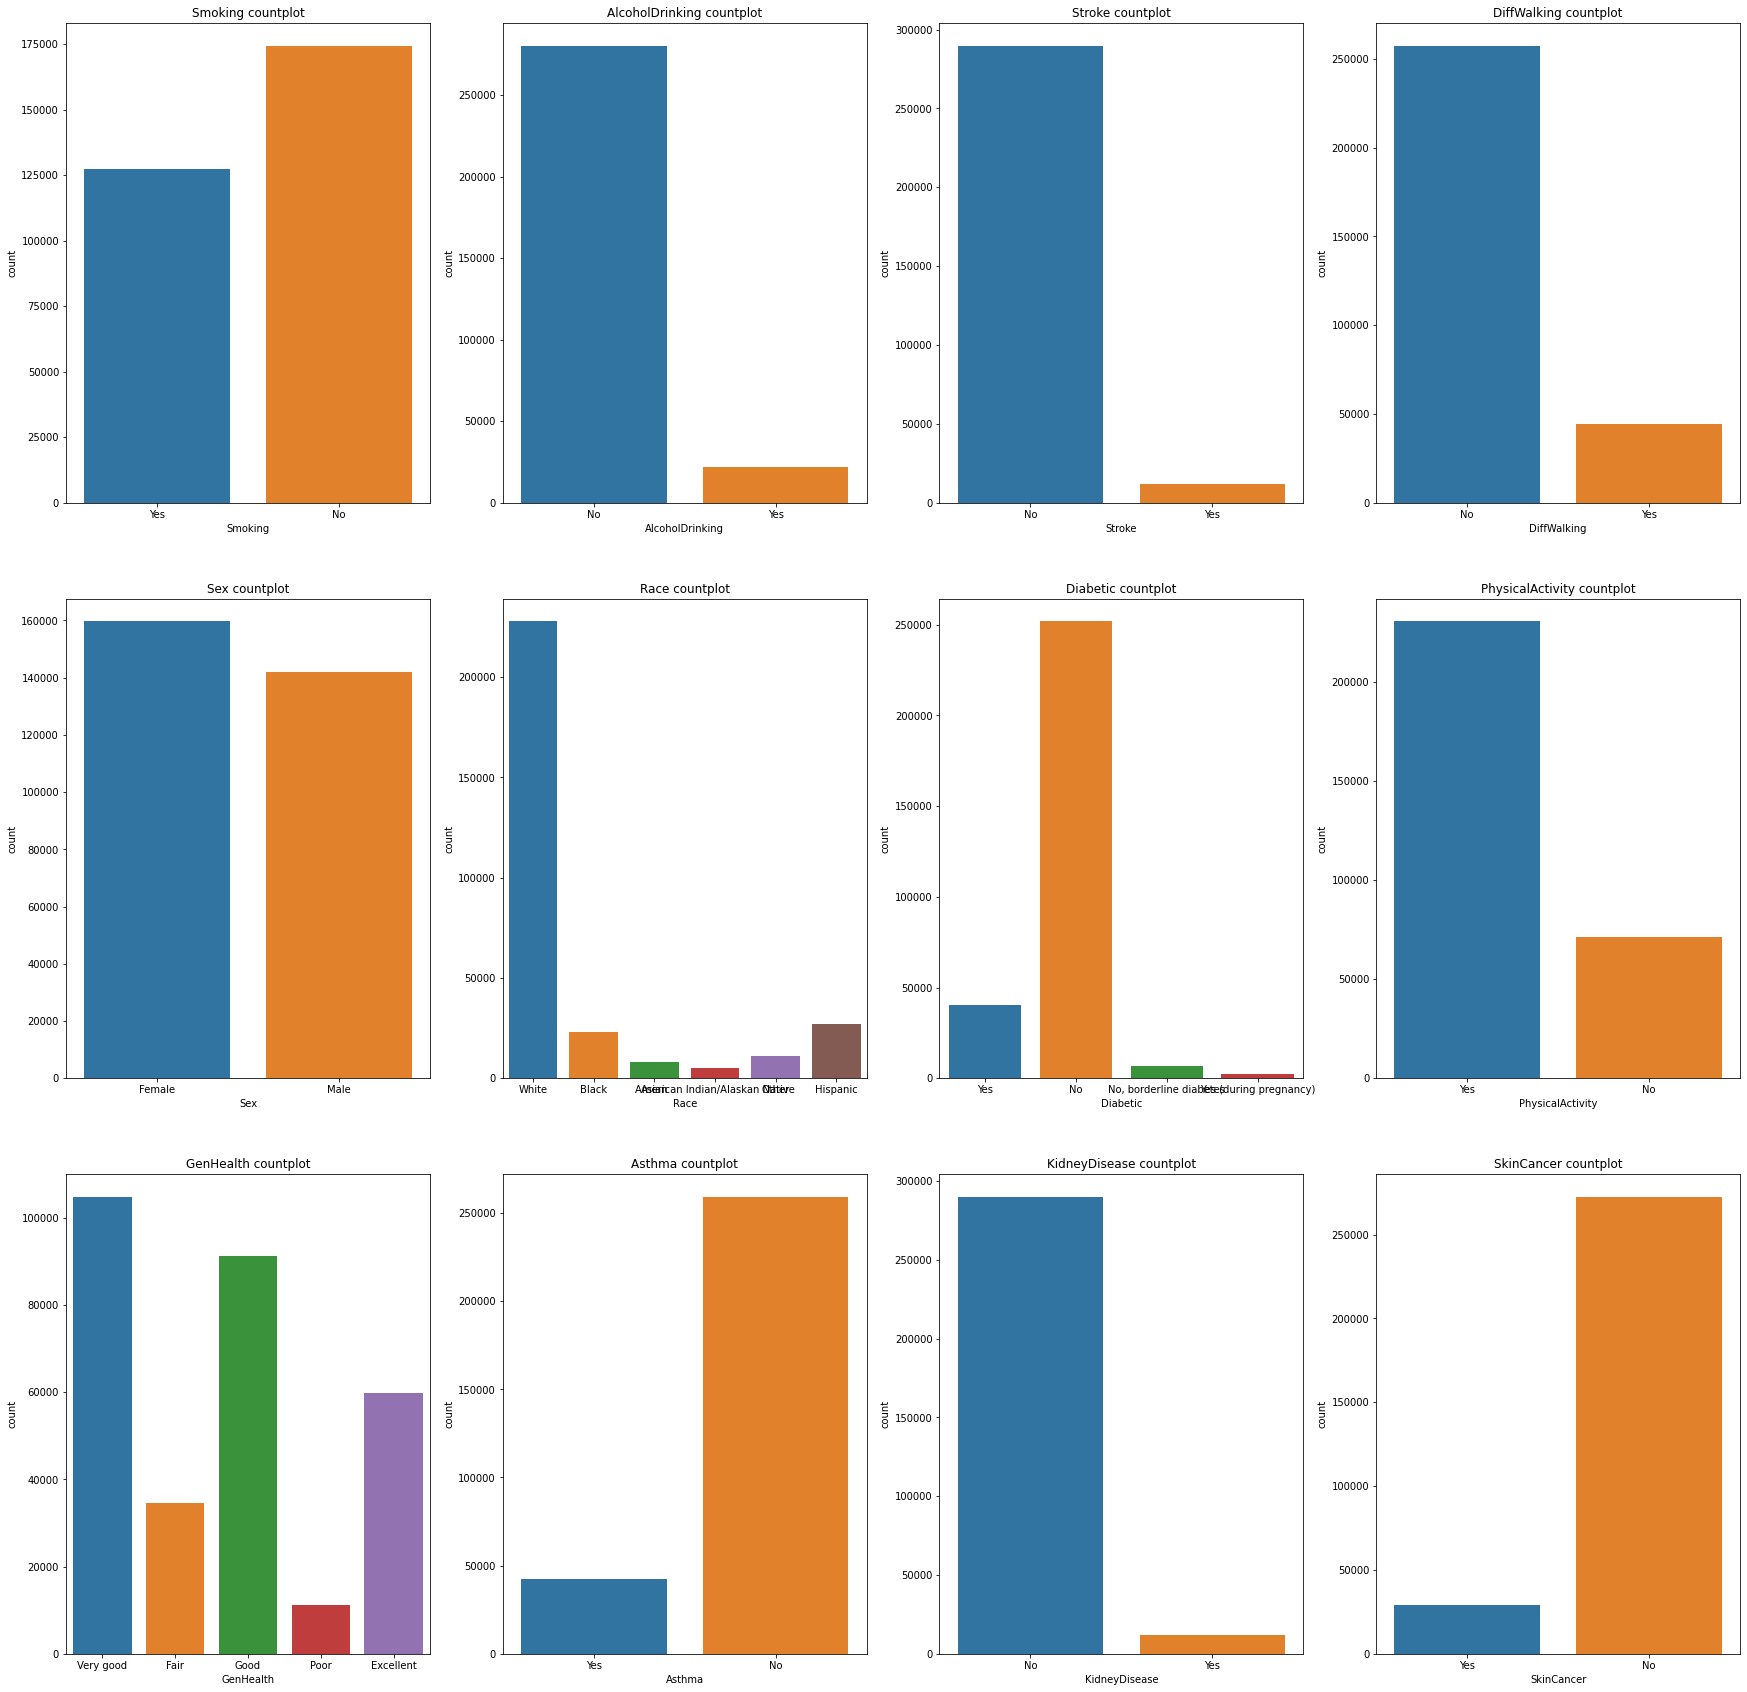

In [ ]:
discrete_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (30, 30))
for i in range(3):
    for j in range(4):
        sns.countplot(x = discrete_columns[4 * i + j], data = df, ax = axes[i][j])
        axes[i][j].set_title(discrete_columns[4 * i + j] + " countplot")

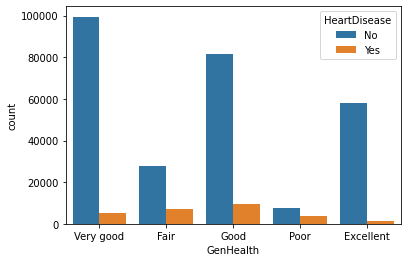

In [ ]:
sns.countplot(x = "GenHealth", hue = "HeartDisease", data = df)

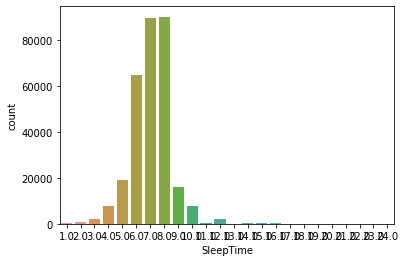

In [ ]:
sns.countplot(x = "SleepTime", data = df)

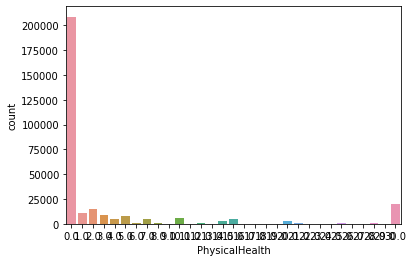

In [ ]:
sns.countplot(x = "PhysicalHealth", data = df)

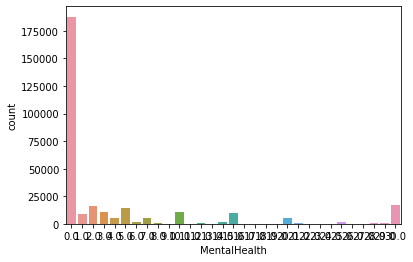

In [ ]:
sns.countplot(x = "MentalHealth", data =df)

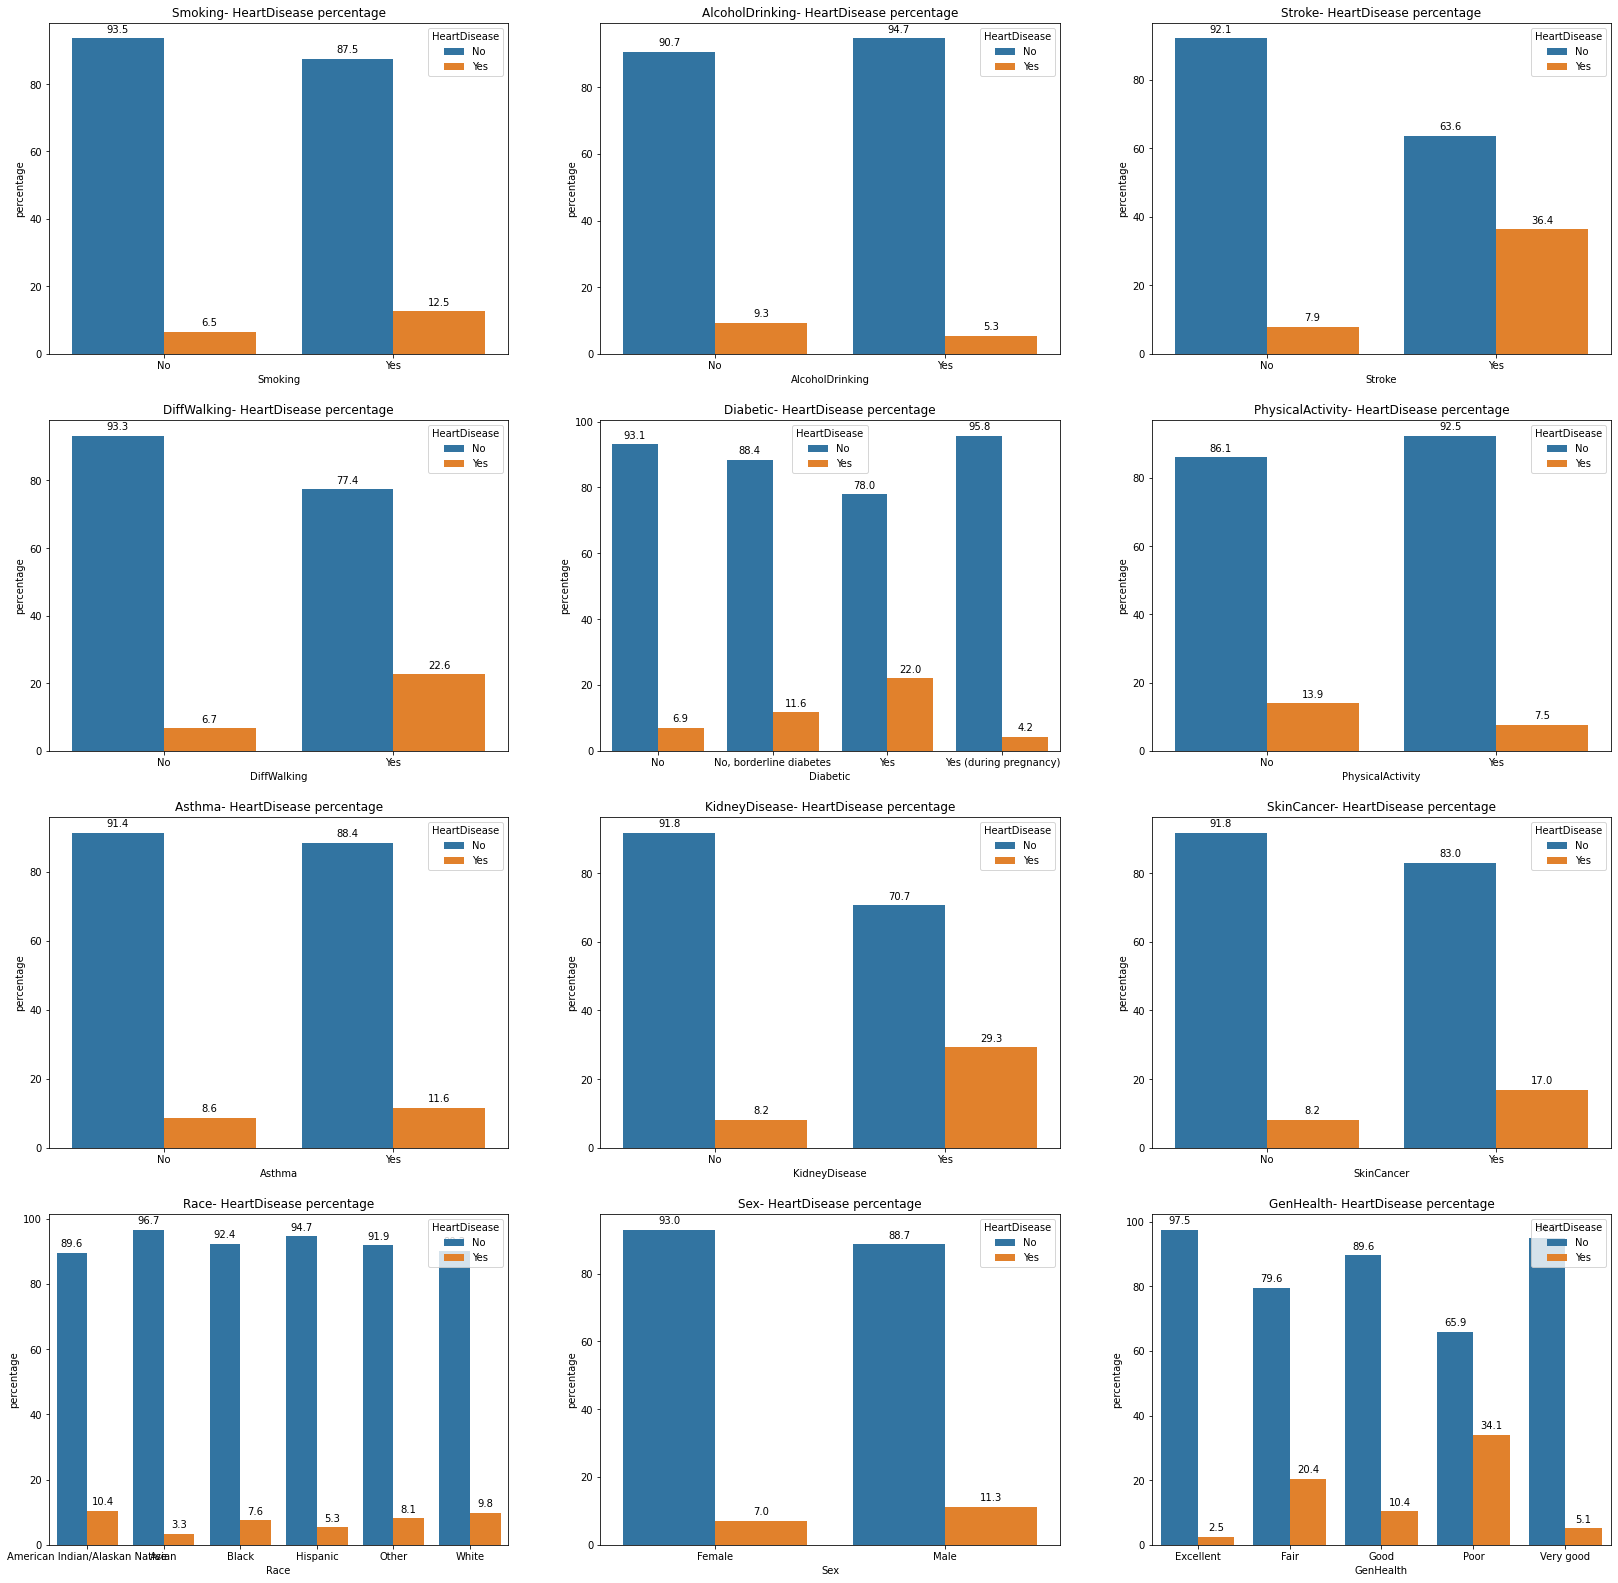

In [ ]:
columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Race', 'Sex', 'GenHealth']
fig, axes = plt.subplots(nrows= 4, ncols = 3, figsize = (28, 28))
for i in range(4):
    for j in range(3):
        occupation_counts = df.groupby(columns[3 * i + j])['HeartDisease'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
        sns.barplot(x = columns[3 * i + j], y = 'percentage', hue = 'HeartDisease', data = occupation_counts, ax = axes[i][j])
        axes[i][j].set_title(columns[3 * i + j] + '- HeartDisease percentage')

        for p in axes[i][j].patches:
            axes[i][j].annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

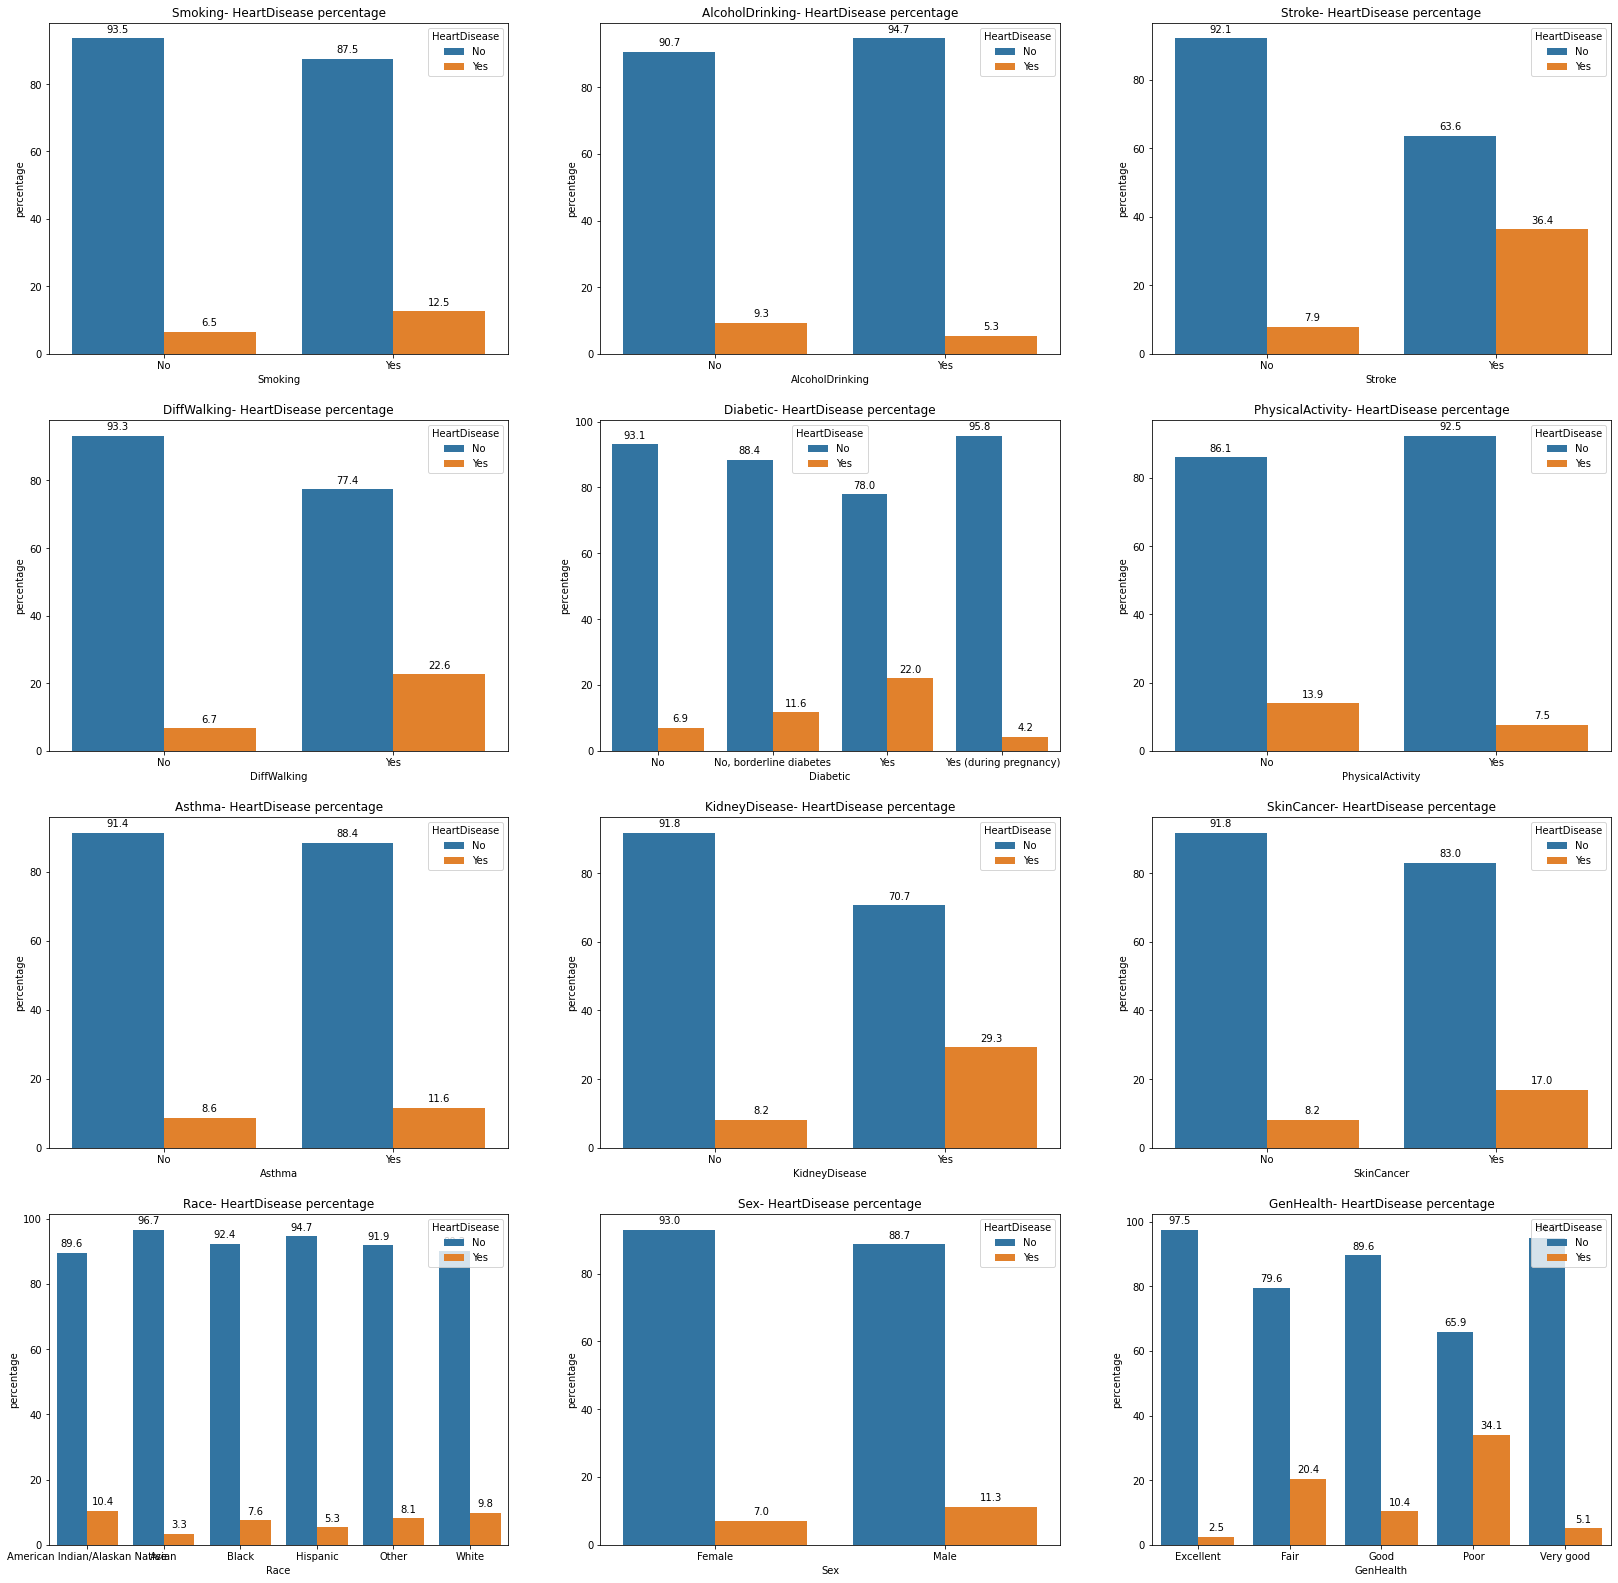

In [ ]:
columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Race', 'Sex', 'GenHealth']
fig, axes = plt.subplots(nrows= 4, ncols = 3, figsize = (28, 28))
for i in range(4):
    for j in range(3):
        occupation_counts = df.groupby(columns[3 * i + j])['HeartDisease'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
        sns.barplot(x = columns[3 * i + j], y = 'percentage', hue = 'HeartDisease', data = occupation_counts, ax = axes[i][j])
        axes[i][j].set_title(columns[3 * i + j] + '- HeartDisease percentage')

        for p in axes[i][j].patches:
            axes[i][j].annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

In [ ]:
df['SleepTime'].describe()

count    301717.000000
mean          7.084559
std           1.467122
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: SleepTime, dtype: float64

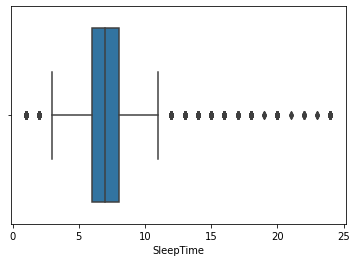

In [ ]:
sns.boxplot(x = df['SleepTime'])

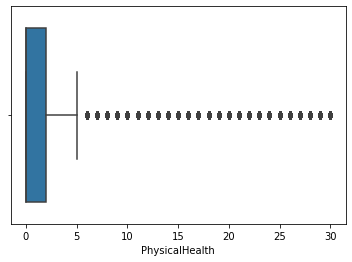

In [ ]:
sns.boxplot(x = df['PhysicalHealth'])

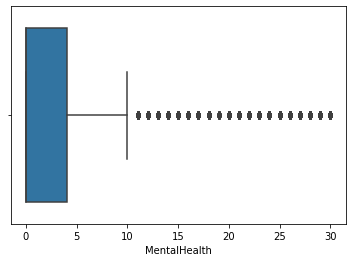

In [ ]:
sns.boxplot(x = df['MentalHealth'])

In [ ]:
df['MentalHealth'].value_counts()

0.0     187898
30.0     17351
2.0      16309
5.0      14004
10.0     10459
3.0      10412
15.0      9871
1.0       9235
7.0       5516
20.0      5426
4.0       5364
14.0      2048
25.0      1953
6.0       1510
8.0       1094
12.0       757
28.0       515
21.0       352
29.0       317
18.0       211
9.0        203
16.0       152
17.0       128
27.0       126
13.0       110
22.0        98
11.0        83
23.0        68
24.0        67
26.0        59
19.0        21
Name: MentalHealth, dtype: int64

In [ ]:
df['PhysicalHealth'].value_counts()

0.0     208611
30.0     19503
2.0      14846
1.0      10459
3.0       8608
5.0       7590
10.0      5450
15.0      5012
7.0       4629
4.0       4467
20.0      3216
14.0      2892
6.0       1270
25.0      1164
8.0        924
21.0       626
12.0       605
28.0       446
29.0       204
9.0        180
18.0       167
16.0       135
27.0       124
17.0       110
13.0        91
22.0        89
11.0        85
24.0        67
26.0        66
23.0        46
19.0        35
Name: PhysicalHealth, dtype: int64

In [ ]:
df['SleepTime'].value_counts()

8.0     90202
7.0     89445
6.0     64655
5.0     19101
9.0     15853
10.0     7782
4.0      7730
12.0     2204
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: SleepTime, dtype: int64

Text(0.5, 1.0, 'AgeCategory - Diabetic percentage')

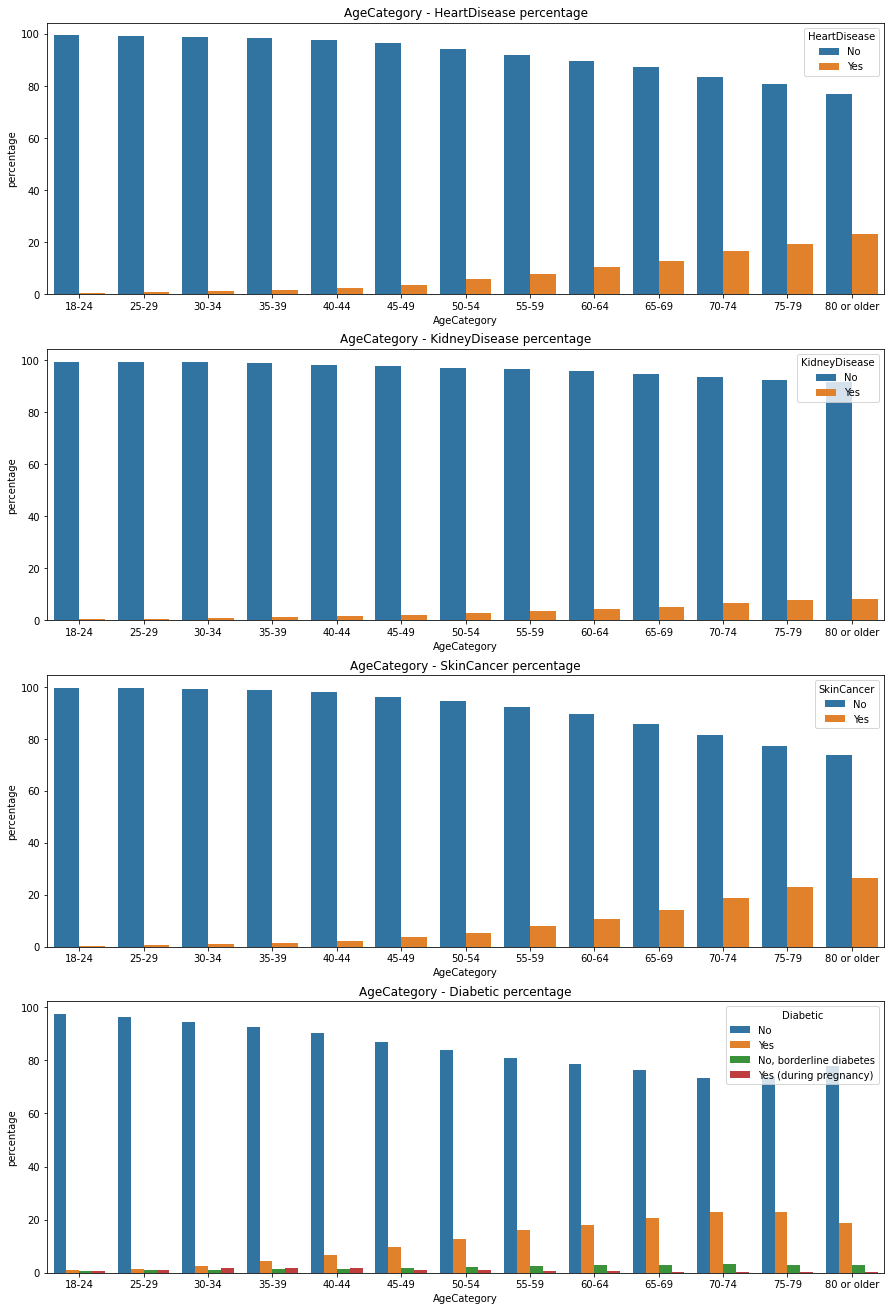

In [ ]:
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (15, 23))
occupation_counts = df.groupby('AgeCategory')['HeartDisease'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'AgeCategory', y = 'percentage', hue = 'HeartDisease', data = occupation_counts, ax = axes[0])
axes[0].set_title('AgeCategory ' + '- HeartDisease percentage')

occupation_counts = df.groupby('AgeCategory')['KidneyDisease'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'AgeCategory', y = 'percentage', hue = 'KidneyDisease', data = occupation_counts, ax = axes[1])
axes[1].set_title('AgeCategory ' + '- KidneyDisease percentage')

occupation_counts = df.groupby('AgeCategory')['SkinCancer'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'AgeCategory', y = 'percentage', hue = 'SkinCancer', data = occupation_counts, ax = axes[2])
axes[2].set_title('AgeCategory ' + '- SkinCancer percentage')

occupation_counts = df.groupby('AgeCategory')['Diabetic'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'AgeCategory', y = 'percentage', hue = 'Diabetic', data = occupation_counts, ax = axes[3])
axes[3].set_title('AgeCategory ' + '- Diabetic percentage')

Text(0.5, 1.0, 'AgeCategory - PhysicalActivity percentage')

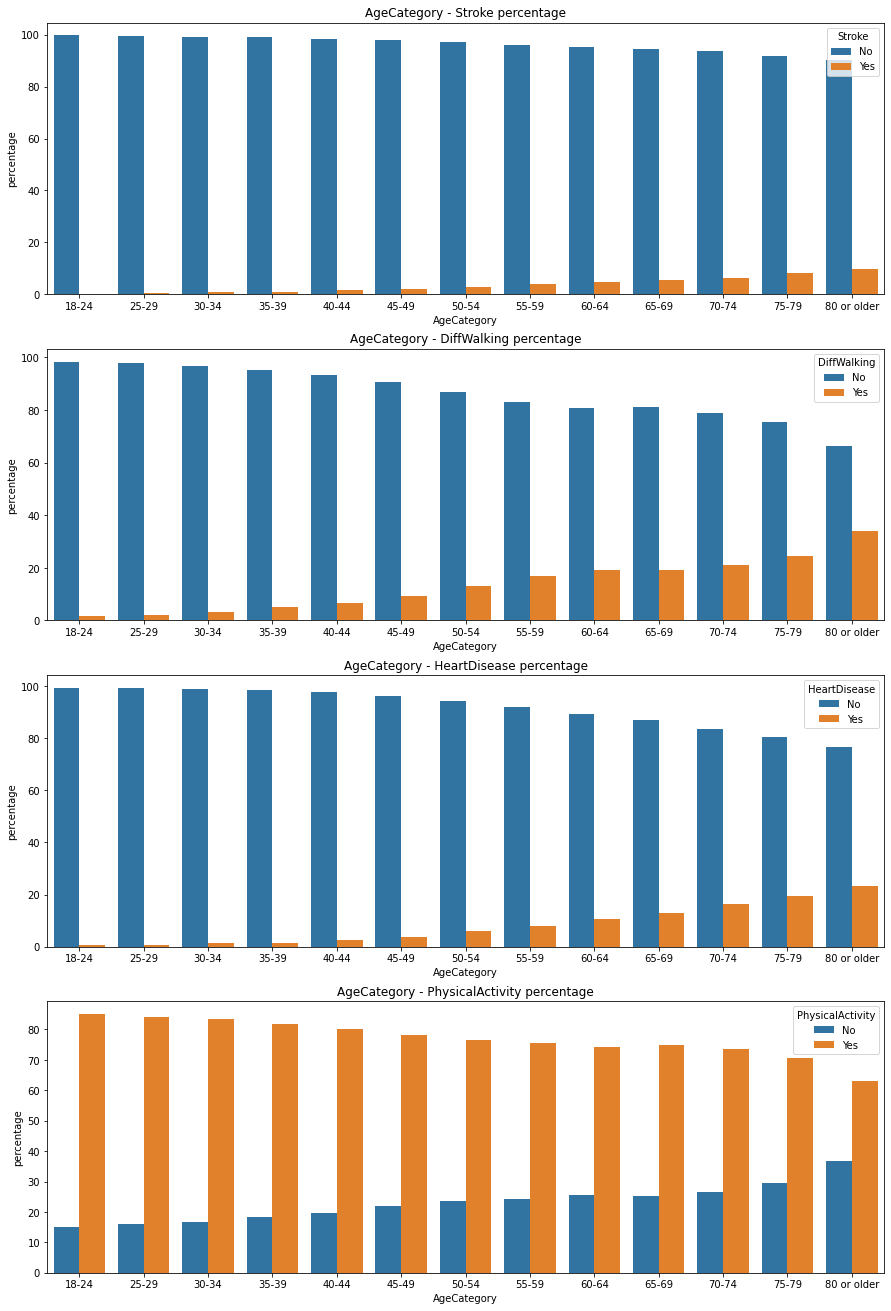

In [ ]:
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (15, 23))

occupation_counts = df.groupby('AgeCategory')['Stroke'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'AgeCategory', y = 'percentage', hue = 'Stroke', data = occupation_counts, ax = axes[0])
axes[0].set_title('AgeCategory ' + '- Stroke percentage')

occupation_counts = df.groupby('AgeCategory')['DiffWalking'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'AgeCategory', y = 'percentage', hue = 'DiffWalking', data = occupation_counts, ax = axes[1])
axes[1].set_title('AgeCategory ' + '- DiffWalking percentage')

occupation_counts = df.groupby('AgeCategory')['HeartDisease'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'AgeCategory', y = 'percentage', hue = 'HeartDisease', data = occupation_counts, ax = axes[2])
axes[2].set_title('AgeCategory ' + '- HeartDisease percentage')

occupation_counts = df.groupby('AgeCategory')['PhysicalActivity'].value_counts(normalize = True, ascending = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'AgeCategory', y = 'percentage', hue = 'PhysicalActivity', data = occupation_counts, ax = axes[3])
axes[3].set_title('AgeCategory ' + '- PhysicalActivity percentage')

Text(0.5, 1.0, 'PhysicalHealth - HeartDisease percentage')

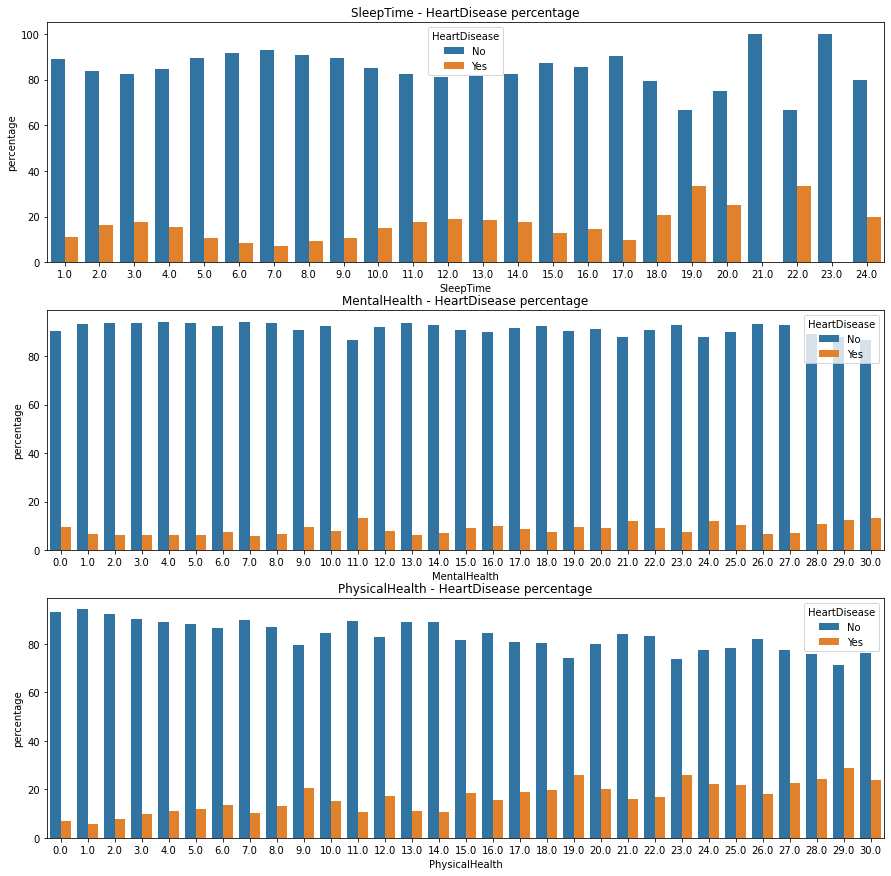

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (15, 15))
occupation_counts = df.groupby('SleepTime')['HeartDisease'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'SleepTime', y = 'percentage', hue = 'HeartDisease', data = occupation_counts, ax = axes[0])
axes[0].set_title('SleepTime ' + '- HeartDisease percentage')

occupation_counts = df.groupby('MentalHealth')['HeartDisease'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'MentalHealth', y = 'percentage', hue = 'HeartDisease', data = occupation_counts, ax = axes[1])
axes[1].set_title('MentalHealth ' + '- HeartDisease percentage')

occupation_counts = df.groupby('PhysicalHealth')['HeartDisease'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'PhysicalHealth', y = 'percentage', hue = 'HeartDisease', data = occupation_counts, ax = axes[2])
axes[2].set_title('PhysicalHealth ' + '- HeartDisease percentage')

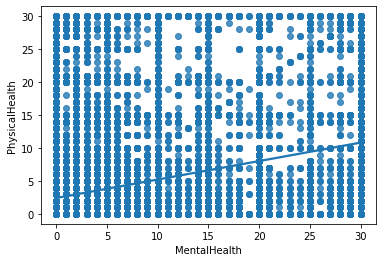

In [ ]:
sns.regplot(x = df['MentalHealth'], y = df['PhysicalHealth'])

Text(0.5, 1.0, 'AgeCategory - HeartDisease percentage')

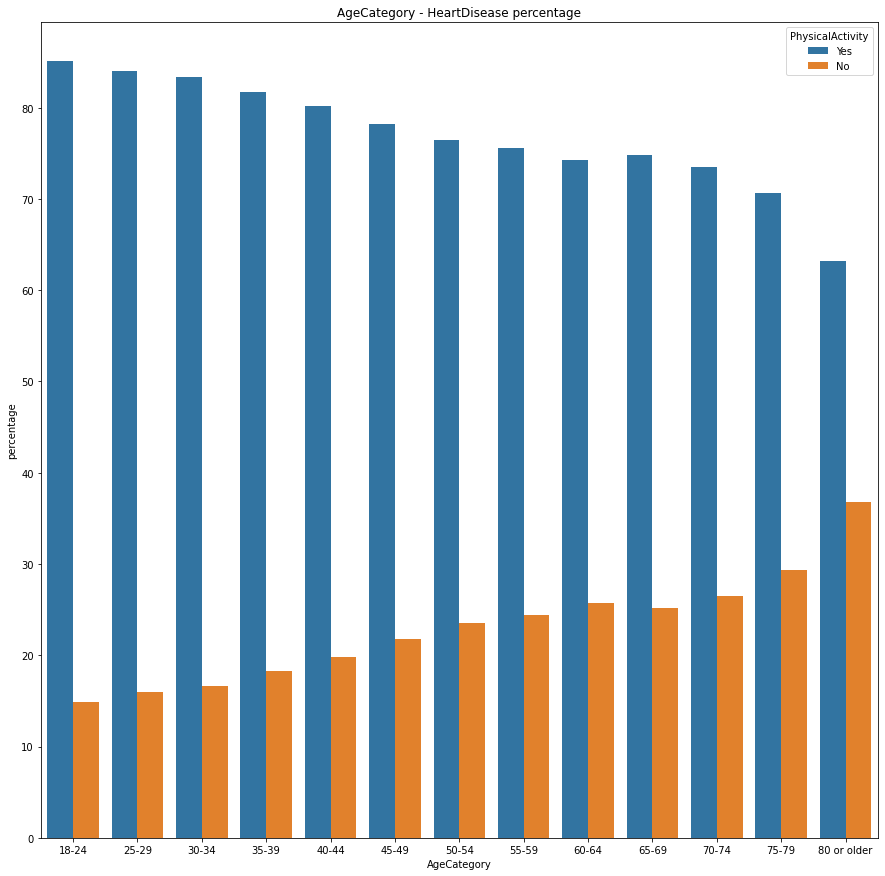

In [ ]:
plt.figure(figsize = (15, 15))
occupation_counts = df.groupby('AgeCategory')['PhysicalActivity'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'AgeCategory', y = 'percentage', hue = 'PhysicalActivity', data = occupation_counts)
plt.title('AgeCategory ' + '- HeartDisease percentage')

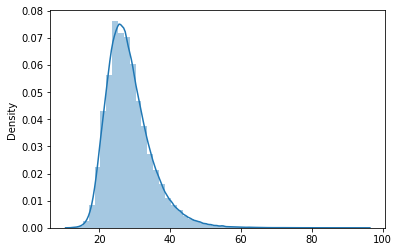

In [ ]:
sns.distplot(x = df['BMI'])

In [ ]:
df['BMI'].describe()

count    301717.000000
mean         28.441970
std           6.468134
min          12.020000
25%          24.030000
50%          27.410000
75%          31.650000
max          94.850000
Name: BMI, dtype: float64

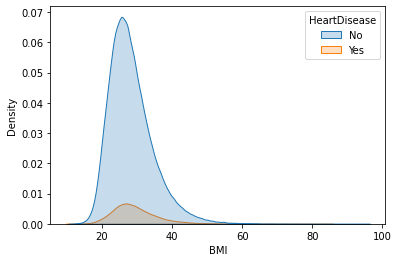

In [ ]:
sns.kdeplot(x = df['BMI'], hue = df['HeartDisease'], shade = True)

In [ ]:
def yesno_tolabel(x):
    if (x == 'Yes') | (x == 'Yes (during pregnancy)') :
        return 1
    else:
        return 0

In [ ]:
df['Diabetic'].value_counts()

No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: Diabetic, dtype: int64

In [ ]:
df['Diabetic'].value_counts()

No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: Diabetic, dtype: int64

In [ ]:
columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
sex_map = {'Female' : 0, 'Male' : 1}
health_map = {'Excellent' : 4, 'Very good' : 3, 'Good' : 2, 'Fair' : 1, 'Poor' : 0}
diabetic_map = {'Yes' : 2, 'Yes (during pregnancy)' : 2, 'No, borderline diabetes' : 1, 'No' : 0}
for column in columns:
    df[column] = df[column].apply(lambda x : yesno_tolabel(x))

df['Sex'] = df['Sex'].map(sex_map)
df['GenHealth'] = df['GenHealth'].map(health_map)
df['Diabetic'] = df['Diabetic'].map(diabetic_map)

In [ ]:
age_map = {'18-24' : 20, '25-29' : 25, '30-34' : 30, '35-39' : 35, '40-44' : 40, '45-49' : 45, '50-54' : 50, '55-59' : 55, '60-64' : 60, '65-69' : 65, '70-74' : 70, '75-79' : 75, '80 or older' : 80}
df['AgeCategory'] = df['AgeCategory'].map(age_map)

In [ ]:
df.shape

(301717, 19)

Text(0.5, 1.0, 'AgeCategory - percentage')

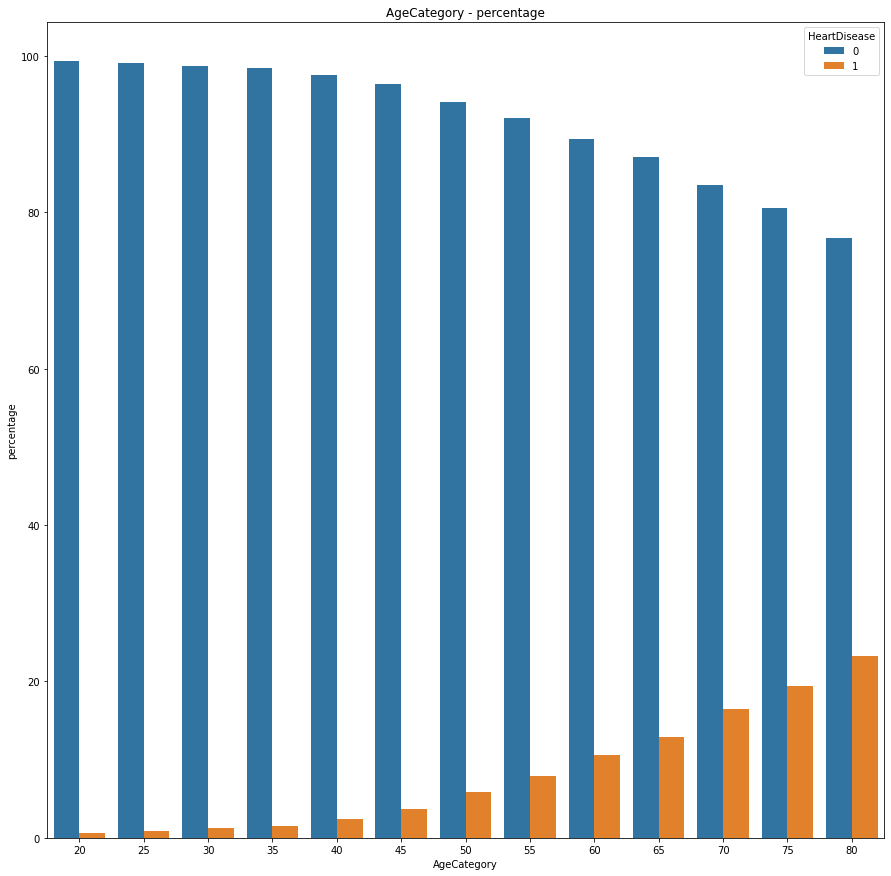

In [ ]:
plt.figure(figsize = (15, 15))
occupation_counts = df.groupby('AgeCategory')['HeartDisease'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'AgeCategory', y = 'percentage', hue = 'HeartDisease', data = occupation_counts)
plt.title('AgeCategory ' + '- percentage')

Text(0.5, 1.0, 'AgeCategory - percentage')

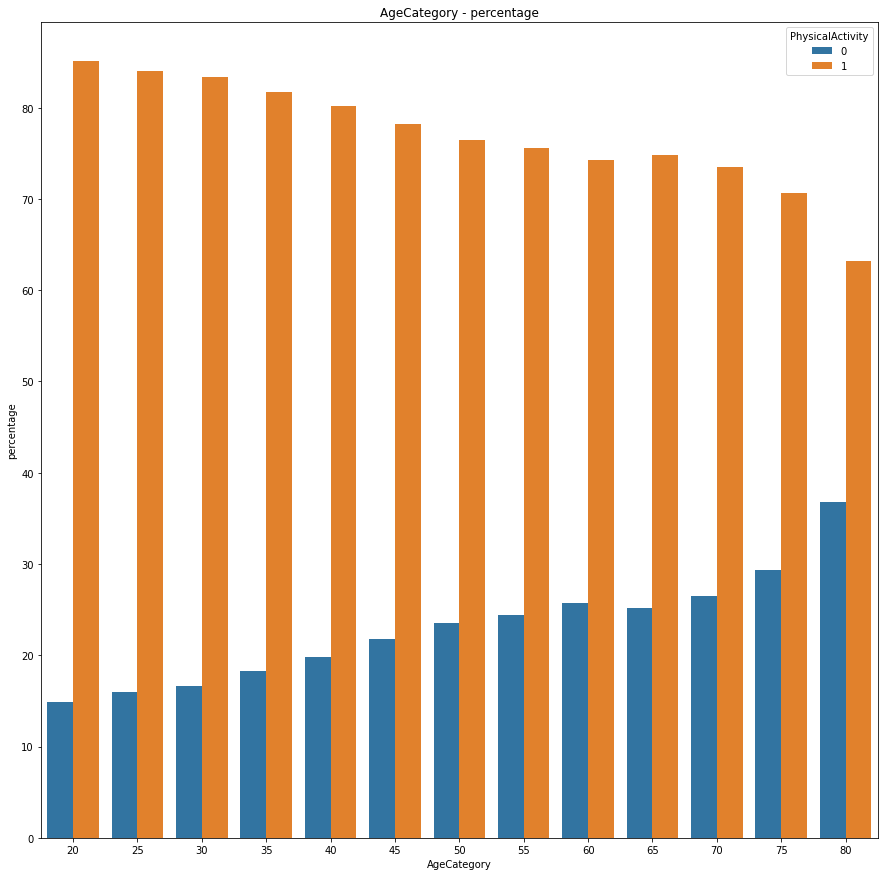

In [ ]:
plt.figure(figsize = (15, 15))
occupation_counts = df.groupby('AgeCategory')['PhysicalActivity'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'AgeCategory', y = 'percentage', hue = 'PhysicalActivity', data = occupation_counts)
plt.title('AgeCategory ' + '- percentage')

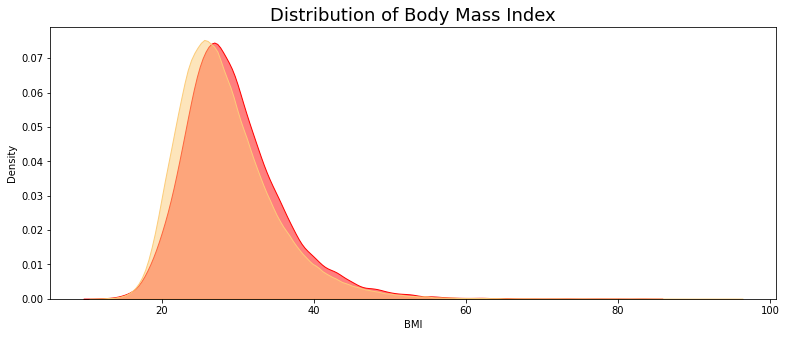

In [ ]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
plt.show()

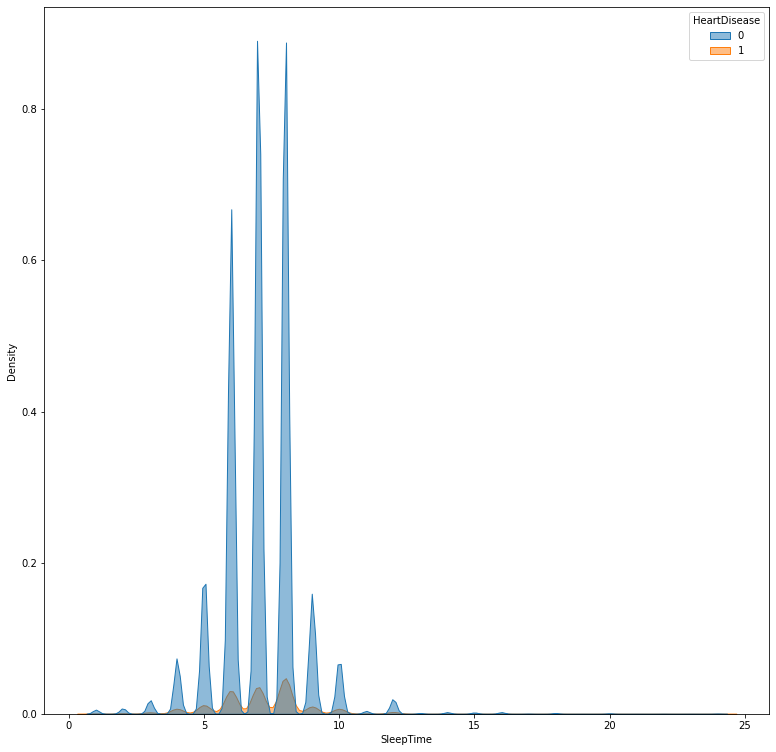

In [ ]:
plt.figure(figsize = (13, 13))
sns.kdeplot(x = df['SleepTime'], hue = df['HeartDisease'], alpha = 0.5, shade = True)

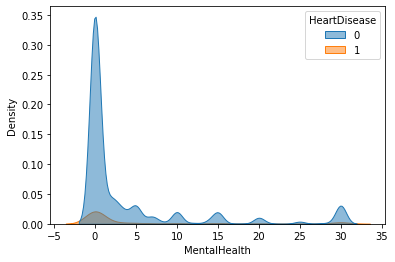

In [ ]:
sns.kdeplot(x = df['MentalHealth'], hue = df['HeartDisease'], shade = True, alpha = 0.5)

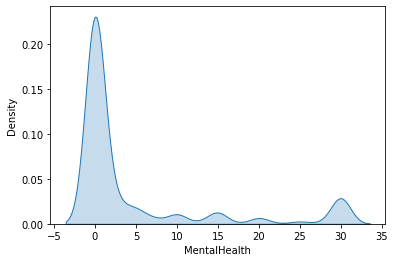

In [ ]:
sns.kdeplot(x = "MentalHealth", data = df[df['HeartDisease'] == 1], shade =True)

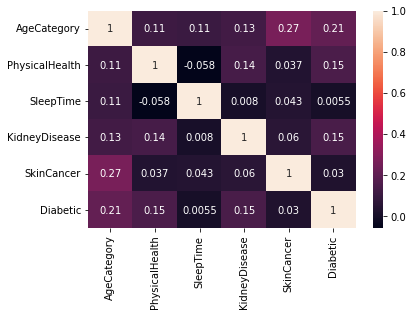

In [ ]:
sns.heatmap(df[['AgeCategory', 'PhysicalHealth', 'SleepTime', 'KidneyDisease', 'SkinCancer', 'Diabetic']].corr(), annot = True)

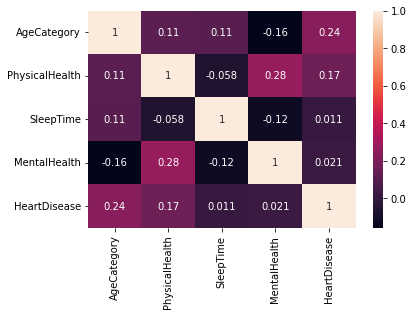

In [ ]:
numerical_columns = ['AgeCategory', 'PhysicalHealth', 'SleepTime', 'MentalHealth']
df_numerical = pd.DataFrame(df[numerical_columns], columns = numerical_columns)
df_numerical = df_numerical.join(df['HeartDisease'])
sns.heatmap(df_numerical.iloc[:, 0:].corr(), annot=True)

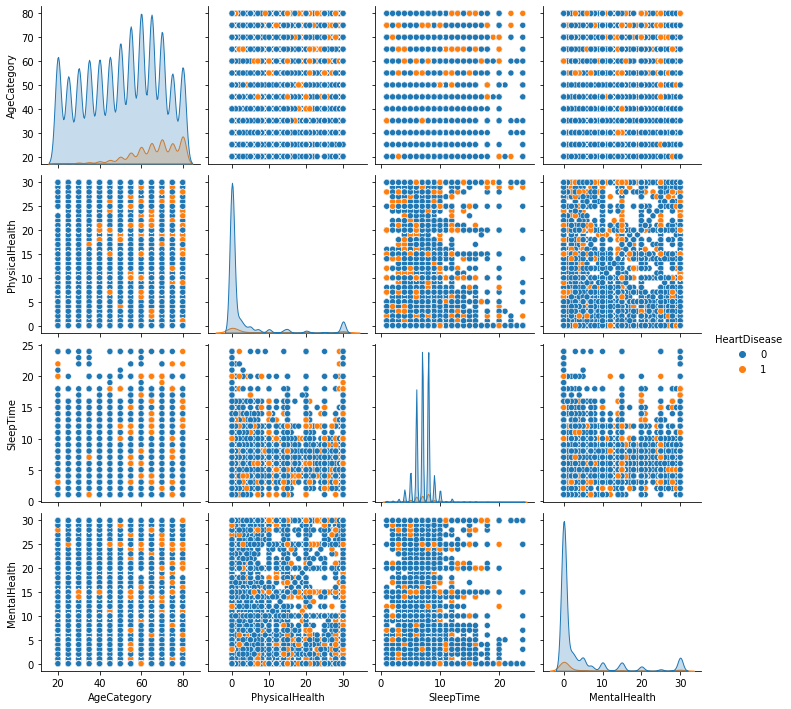

In [ ]:
sns.pairplot(df_numerical, hue='HeartDisease')

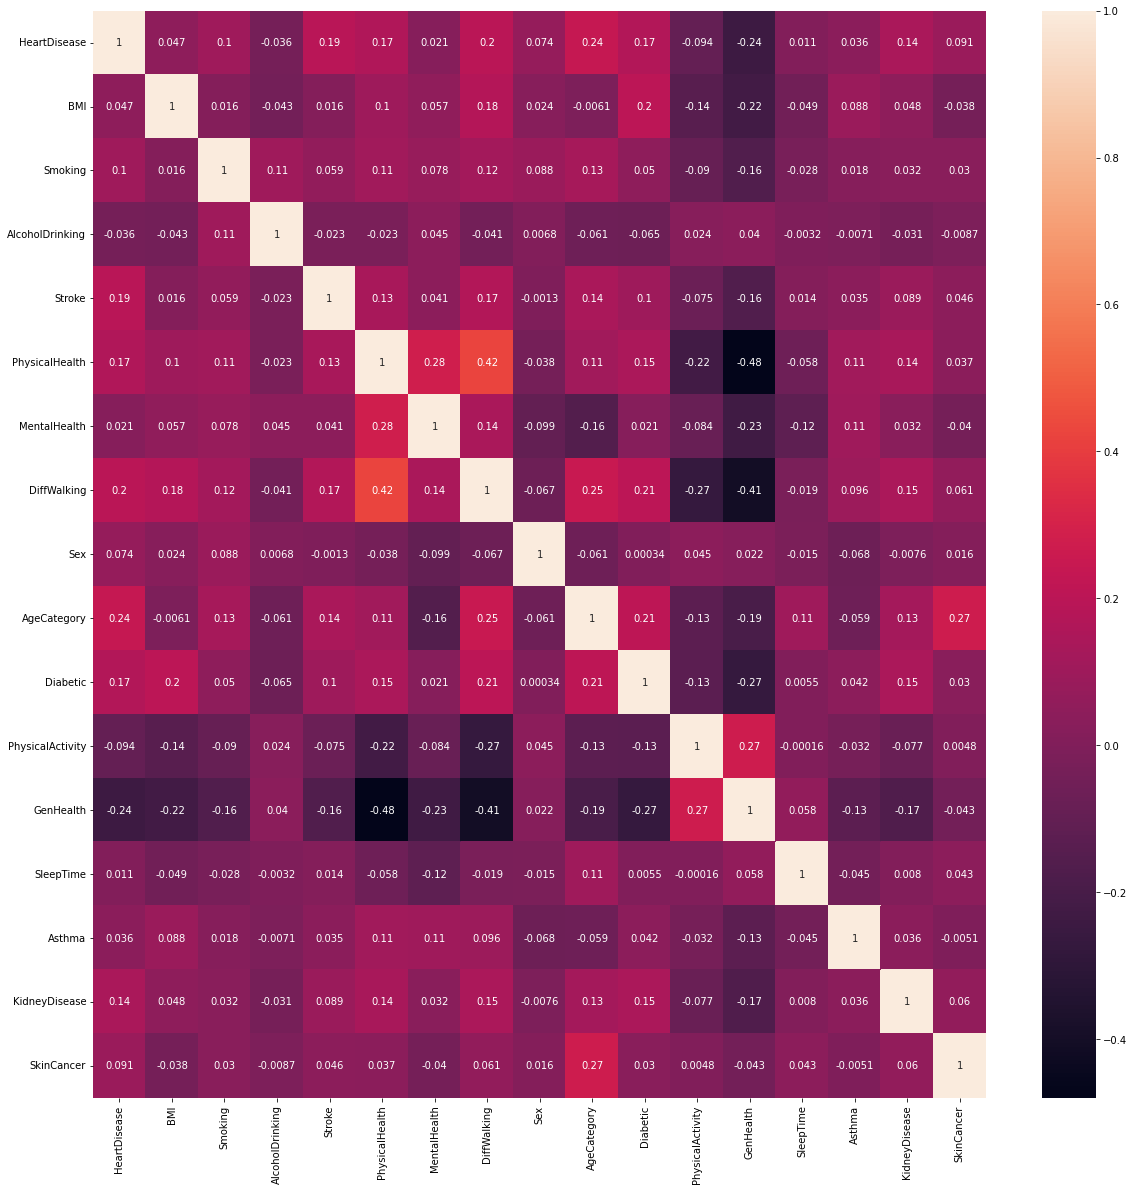

In [ ]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.drop(['Race'], axis = 1).corr(), annot = True)

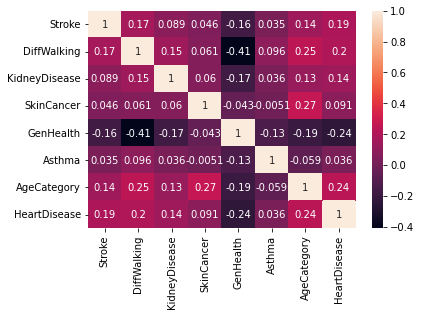

In [ ]:
sns.heatmap(df[['Stroke', 'DiffWalking', 'KidneyDisease', 'SkinCancer', 'GenHealth', 'Asthma', 'AgeCategory', 'HeartDisease']].astype(float).corr(), annot= True)

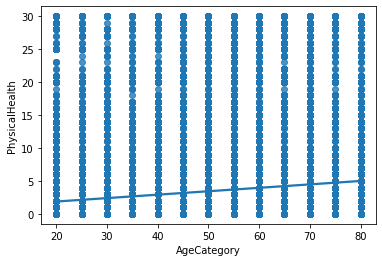

In [ ]:
sns.regplot(x = df['AgeCategory'], y = df['PhysicalHealth'])

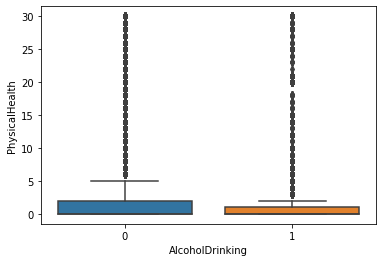

In [ ]:
sns.boxplot(x = df['AlcoholDrinking'], y = df['PhysicalHealth'])

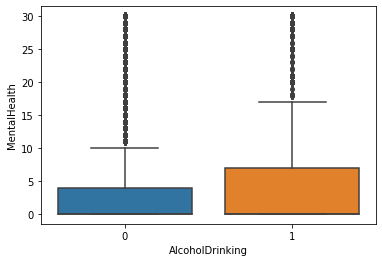

In [ ]:
sns.boxplot(x = df['AlcoholDrinking'], y = df['MentalHealth'])

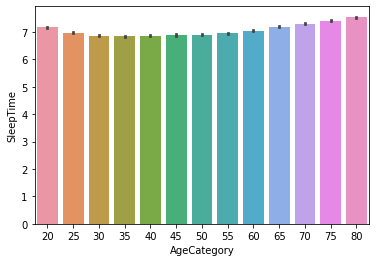

In [ ]:
sns.barplot(x = df['AgeCategory'], y = df['SleepTime'])

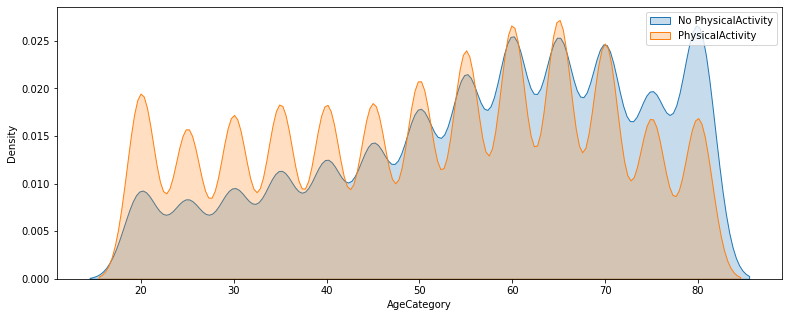

In [ ]:
plt.figure(figsize=(13,5))
sns.kdeplot(df[df["PhysicalActivity"]== 0]["AgeCategory"], shade=True, label = 'No PhysicalActivity')
sns.kdeplot(df[df["PhysicalActivity"]== 1]["AgeCategory"], shade=True, label = 'PhysicalActivity')
plt.legend()

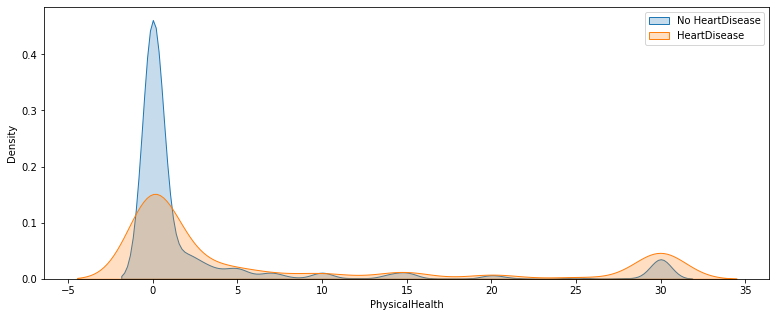

In [ ]:
plt.figure(figsize=(13,5))
sns.kdeplot(df[df["HeartDisease"]== 0]["PhysicalHealth"], shade=True, label = 'No HeartDisease')
sns.kdeplot(df[df["HeartDisease"]== 1]["PhysicalHealth"], shade=True, label = 'HeartDisease')
plt.legend()

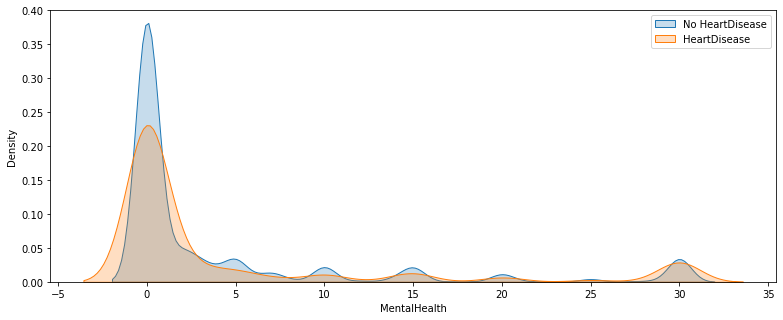

In [ ]:
plt.figure(figsize=(13,5))
sns.kdeplot(df[df["HeartDisease"]== 0]["MentalHealth"], shade=True, label = 'No HeartDisease')
sns.kdeplot(df[df["HeartDisease"]== 1]["MentalHealth"], shade=True, label = 'HeartDisease')
plt.legend()

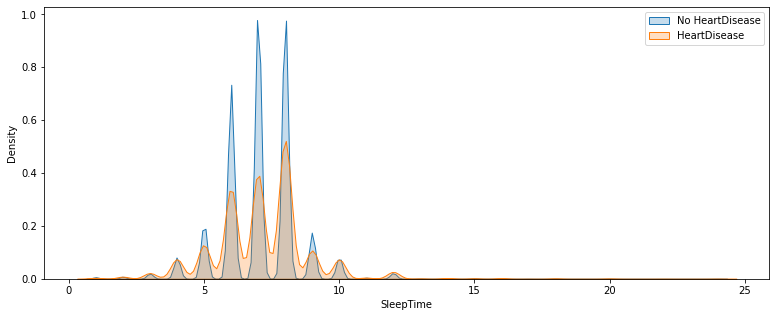

In [ ]:
plt.figure(figsize=(13,5))
sns.kdeplot(df[df["HeartDisease"]== 0]["SleepTime"], shade=True, label = 'No HeartDisease')
sns.kdeplot(df[df["HeartDisease"]== 1]["SleepTime"], shade=True, label = 'HeartDisease')
plt.legend()

Text(0.5, 1.0, 'Normal_sleep - HeartDisease percentage')

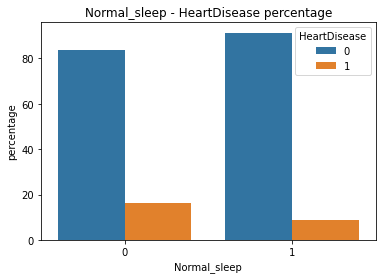

In [ ]:
#Race - Physical Health
#Physical Health -> DiffWalking, Stroke, Diabetic, GenHealth, SleepTime, KidneyDisease
def normal(x):
    if (x >= 5) & (x <= 11):
        return 1
    else:
        return 0
df['Normal_sleep'] = df['SleepTime'].apply(lambda x : normal(x))
occupation_counts = df.groupby('Normal_sleep')['HeartDisease'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'Normal_sleep', y = 'percentage', hue = 'HeartDisease', data = occupation_counts)
plt.title('Normal_sleep ' + '- HeartDisease percentage')

Text(0.5, 1.0, 'Race - HeartDisease percentage')

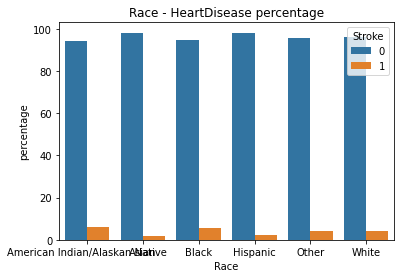

In [ ]:
occupation_counts = df.groupby('Race')['Stroke'].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
sns.barplot(x = 'Race', y = 'percentage', hue = 'Stroke', data = occupation_counts)
plt.title('Race ' + '- HeartDisease percentage')

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(df[['Asthma', 'Diabetic', 'DiffWalking','PhysicalActivity', 'KidneyDisease', 'SkinCancer', 'PhysicalHealth', 'Stroke', 'AlcoholDrinking']].astype(float).corr(), annot= True)

Text(0.5, 1.0, 'Race - PhysicalActivity')

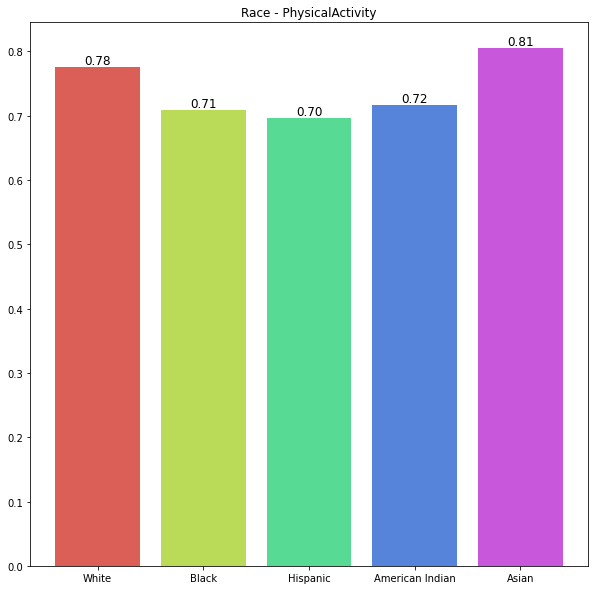

In [ ]:
plt.figure(figsize = (10, 10))
df_White = df[df['Race'] == 'White']
df_Black = df[df['Race'] == 'Black']
df_Hispanic = df[df['Race'] == 'Hispanic']
df_American = df[df['Race'] == 'American Indian/Alaskan Native']
df_Asian = df[df['Race'] == 'Asian']

data_df = [df_White, df_Black, df_Hispanic, df_American, df_Asian]

label_name = ['White', 'Black', 'Hispanic', 'American Indian', 'Asian']
percentage = []
for data in data_df:
    percentage.append(len(data[data['PhysicalActivity'] == 1]) / len(data))

color = sns.color_palette('hls',len(data_df))
bar = plt.bar(x = label_name, height = percentage, color = color)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)
plt.title('Race - PhysicalActivity')

Text(0.5, 1.0, 'AlcoholDrinking - PhysicalActivity')

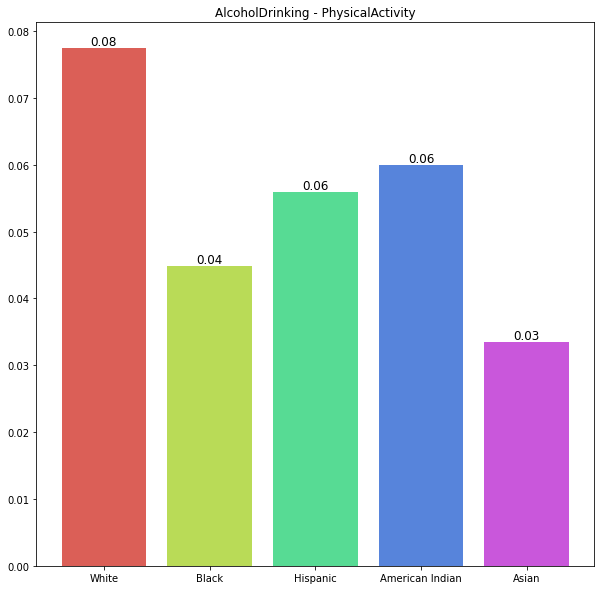

In [ ]:
plt.figure(figsize = (10, 10))
df_White = df[df['Race'] == 'White']
df_Black = df[df['Race'] == 'Black']
df_Hispanic = df[df['Race'] == 'Hispanic']
df_American = df[df['Race'] == 'American Indian/Alaskan Native']
df_Asian = df[df['Race'] == 'Asian']

data_df = [df_White, df_Black, df_Hispanic, df_American, df_Asian]

label_name = ['White', 'Black', 'Hispanic', 'American Indian', 'Asian']
percentage = []
for data in data_df:
    percentage.append(len(data[data['AlcoholDrinking'] == 1]) / len(data))

color = sns.color_palette('hls',len(data_df))
bar = plt.bar(x = label_name, height = percentage, color = color)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)
plt.title('AlcoholDrinking - PhysicalActivity')

In [ ]:
df_White = df[df['Race'] == 'White']
df_Black = df[df['Race'] == 'Black']
df_Hispanic = df[df['Race'] == 'Hispanic']
df_American = df[df['Race'] == 'American Indian/Alaskan Native']
df_Asian = df[df['Race'] == 'Asian']

data_df = [df_White, df_Black, df_Hispanic, df_American, df_Asian]
label_name = ['White', 'Black', 'Hispanic', 'American Indian', 'Asian']

def Race_plot(data, data_name):
    plt.figure(figsize = (8, 8))
    columns = ['Asthma', 'Diabetic', 'DiffWalking', 'KidneyDisease', 'SkinCancer', 'PhysicalHealth', 'Stroke', 'PhysicalActivity']
    percentage = []
    for column in columns:
        percentage.append(len(data[data[column] == 1]) / len(data))

    color = sns.color_palette('hls',len(columns))
    bar = plt.bar(x = columns, height = percentage, color = color)
    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)
    plt.title(data_name + '- ' + column + ' percentage rate')
    plt.xticks(rotation = 45)

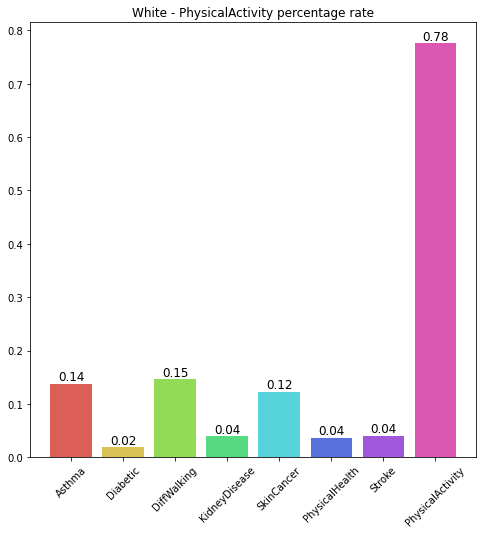

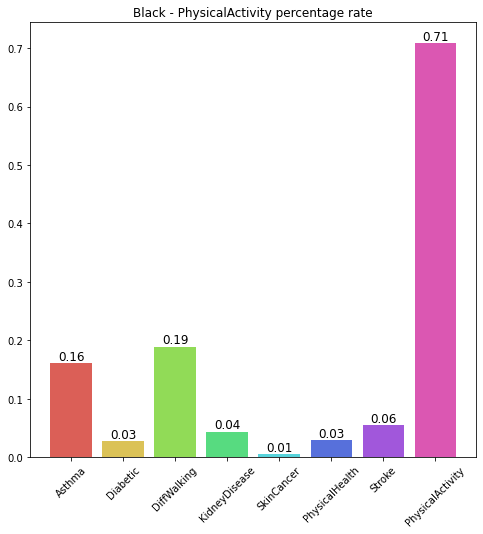

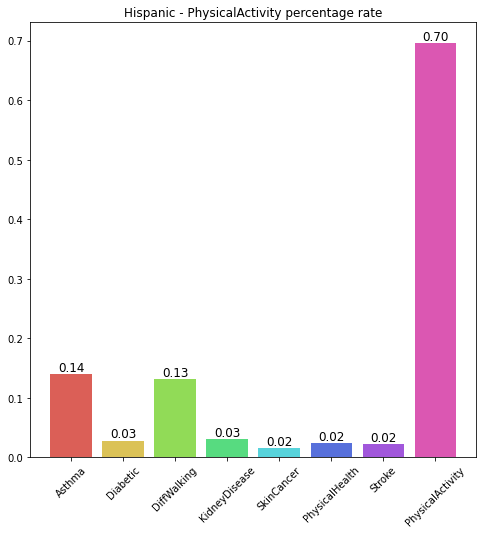

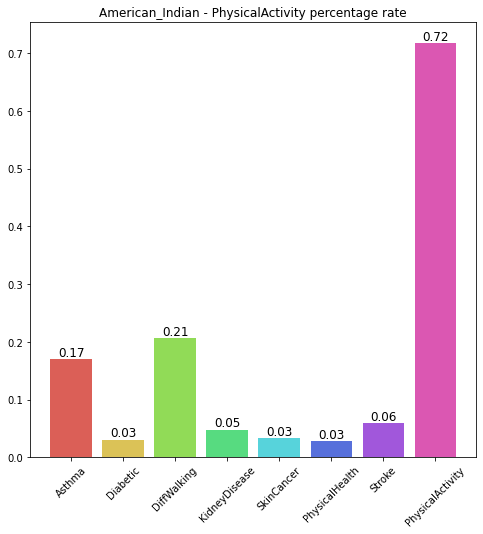

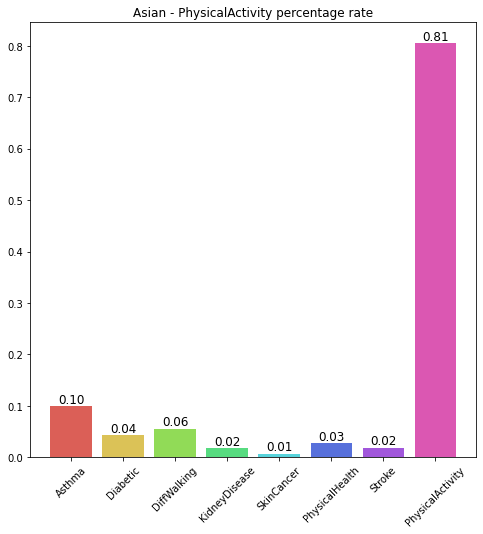

In [ ]:
White_plot = Race_plot(df_White, 'White ')
Black_plot = Race_plot(df_Black, 'Black ')
Hispanic_plot = Race_plot(df_Hispanic, 'Hispanic ')
American_Indian_plot = Race_plot(df_American, 'American_Indian ')
Asian_plot = Race_plot(df_Asian, 'Asian ')

In [ ]:
df.shape

(301717, 19)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np

ohe = OneHotEncoder(sparse = False)
train_race = ohe.fit_transform(df[['Race']])

ohe_hot_df = pd.DataFrame(train_race, columns = ohe.categories_)

ohe_hot_df

,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
301712,0.0,0.0,0.0,1.0,0.0,0.0
301713,0.0,0.0,0.0,1.0,0.0,0.0
301714,0.0,0.0,0.0,1.0,0.0,0.0
301715,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df.drop(['index'], inplace = True, axis = 1)

In [ ]:
df = pd.concat([df.drop(['Race'], axis = 1), ohe_hot_df], axis = 1)
df.shape

(301717, 24)

<Figure size 720x720 with 0 Axes>

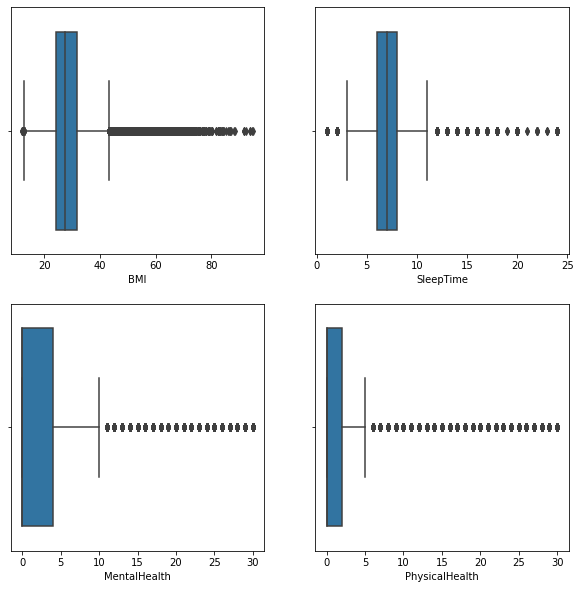

In [ ]:
plt.figure(figsize = (10, 10))
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
sns.boxplot(df['BMI'], ax = axes[0][0])
sns.boxplot(df['SleepTime'], ax = axes[0][1])
sns.boxplot(df['MentalHealth'], ax = axes[1][0])
sns.boxplot(df['PhysicalHealth'], ax = axes[1][1])

In [ ]:
import scipy.stats as stats

test_stat, p_val = stats.kstest(df['AgeCategory'], 'norm', args = (df['AgeCategory'].mean(), df['AgeCategory'].var() ** 0.5))
print('Test-statistics : {}, p-value : {:.3f}'.format(test_stat, p_val))

Test-statistics : 0.11274330041270975, p-value : 0.000


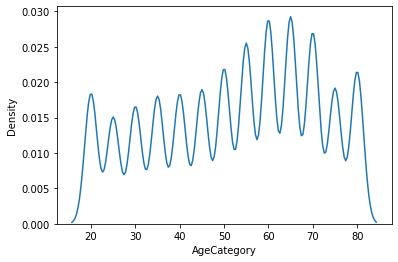

In [ ]:
sns.kdeplot(x = df['AgeCategory'])

In [ ]:
df.to_csv('/content/drive/MyDrive/EDA_finished.csv')

,count,mean
Race,,
American Indian/Alaskan Native,5192,0.104391
Asian,7993,0.033279
Black,22810,0.075800
Hispanic,27107,0.053233
Other,10891,0.081352
White,227724,0.098343
